#### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

**Dataset link:** https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.
### Q2. Split the dataset into a training set (70%) and a test set (30%).
### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.
### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.
### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.
### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\Study\Data Science\Datasets\heart dieases.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.iloc[:,:-1]
y = df['target']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [8]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2


#### Preprocessing

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
preprocessor = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
#     ('scaler',StandardScaler())  ## dont need of scaler because of Decision Tree
])

In [11]:
X_train = preprocessor.fit_transform(X_train)
X_train

array([[38.,  1.,  2., ...,  2.,  4.,  2.],
       [66.,  0.,  0., ...,  1.,  2.,  3.],
       [39.,  0.,  2., ...,  2.,  0.,  2.],
       ...,
       [51.,  0.,  2., ...,  2.,  1.,  2.],
       [47.,  1.,  2., ...,  2.,  0.,  2.],
       [52.,  1.,  3., ...,  1.,  0.,  3.]])

In [12]:
X_test = preprocessor.transform(X_test)

#### Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=10)

In [15]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [16]:
y_pred = rfc.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [18]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8241758241758241
              precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

[[33 11]
 [ 5 42]]


#### Feature Importance

In [19]:
import matplotlib.pyplot as plt

In [20]:
feature_imp = rfc.feature_importances_

In [21]:
feature_imp_df = pd.DataFrame({
    'feature':preprocessor.get_feature_names_out(input_features=X.columns),
    'importance':feature_imp
})

In [22]:
feature_imp_df

,feature,importance
0,age,0.104162
1,sex,0.027019
2,cp,0.159534
3,trestbps,0.090133
4,chol,0.077284
5,fbs,0.009374
6,restecg,0.019133
7,thalach,0.109220
8,exang,0.080442
9,oldpeak,0.094380


In [23]:
feature_imp_df = feature_imp_df.sort_values(by='importance',ascending=False)

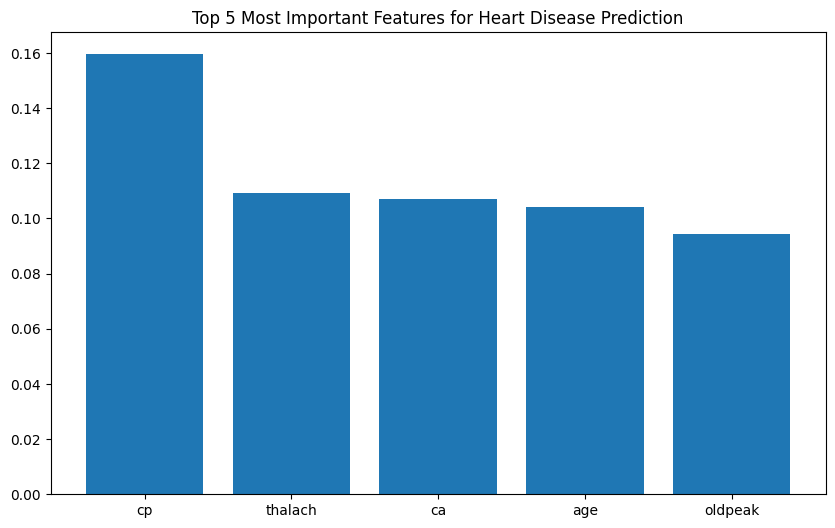

In [24]:
plt.figure(figsize=(10,6))
plt.bar(feature_imp_df.head(5)['feature'],feature_imp_df.head(5)['importance'])
plt.title('Top 5 Most Important Features for Heart Disease Prediction')
plt.show()

#### Hyperparameter Tunig

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [26]:
params = {
    'n_estimators':randint(5,200),
    'criterion':['gini','entropy','logloss'],
    'max_depth':randint(5,30),
    'min_samples_split':randint(2,20),
    'min_samples_leaf':randint(1,10),
    'max_features':['sqrt','log2',None]
}

In [27]:
rsc = RandomizedSearchCV(RandomForestClassifier(),params,cv=5,verbose=3)

In [28]:
rsc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=105;, score=0.791 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=105;, score=0.837 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=105;, score=0.738 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=105;, score=0.833 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=105;, score=0.881 total time=   0.1s
[CV 1/5] END criterion=logloss, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=43;, score=nan total time=   0.0s
[CV 2/5] END criterio

C:\Users\sadar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sadar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sadar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\sadar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'logloss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FCE6196EF0>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FCE61971F0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FCE6197310>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FCE606E5F0>},
                   verbose=3)

In [29]:
rsc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 14,
 'n_estimators': 30}

In [30]:
rsc.best_score_

0.8440753045404208

In [31]:
best_model = rsc.best_estimator_

In [32]:
y_pred = best_model.predict(X_test)

In [33]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8571428571428571
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        44
           1       0.81      0.94      0.87        47

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.86        91
weighted avg       0.87      0.86      0.86        91

[[34 10]
 [ 3 44]]


**As we can see our models accuracy increased by 3%**